In [29]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten  #flatten is used to convert high dimensional array to 2D arrray
import matplotlib.pyplot as plt

In [30]:
(X_train,Y_train),(X_test,Y_test)=keras.datasets.mnist.load_data()

In [31]:
X_train.shape

(60000, 28, 28)

In [32]:
Y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [33]:
X_test.shape

(10000, 28, 28)

In [34]:
Y_test.shape

(10000,)

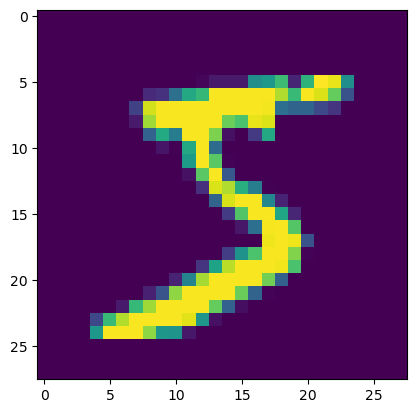

In [35]:
plt.imshow(X_train[0]) #converts pixel value to image

In [36]:
X_train=X_train/255 
X_test=X_test/255
#to make the values in same range(b/w 0-1)

In [66]:
#NETWORK ARCHITECTURE
model=Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax')) #softmax is used when there's multiple output node

C:\Users\gl431\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [67]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 118,282 (462.04 KB)

 Trainable params: 118,282 (462.04 KB)

 Non-trainable params: 0 (0.00 B)

In [68]:
#Compiling
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [69]:
#Training the model
history=model.fit(X_train,Y_train,epochs=12,validation_split=0.2)

Epoch 1/12
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8705 - loss: 0.4376 - val_accuracy: 0.9608 - val_loss: 0.1365
Epoch 2/12
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9655 - loss: 0.1136 - val_accuracy: 0.9667 - val_loss: 0.1098
Epoch 3/12
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9778 - loss: 0.0718 - val_accuracy: 0.9731 - val_loss: 0.0915
Epoch 4/12
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9846 - loss: 0.0514 - val_accuracy: 0.9753 - val_loss: 0.0858
Epoch 5/12
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9869 - loss: 0.0413 - val_accuracy: 0.9750 - val_loss: 0.0943
Epoch 6/12
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9899 - loss: 0.0298 - val_accuracy: 0.9703 - val_loss: 0.1101
Epoch 7/12
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9916 - loss: 0.0240 - val_accuracy: 0.9745 - val_loss: 0.1039
Epoch 8/12
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9928 - loss: 0.0228 - 

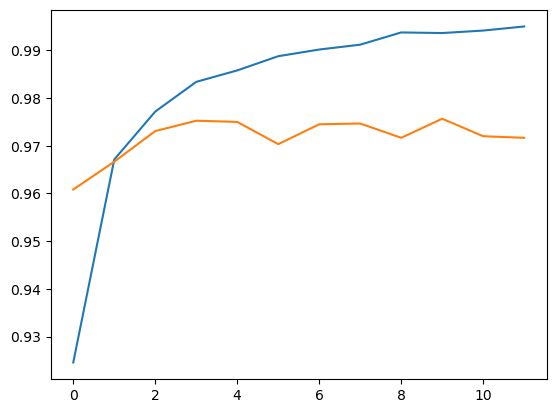

In [70]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

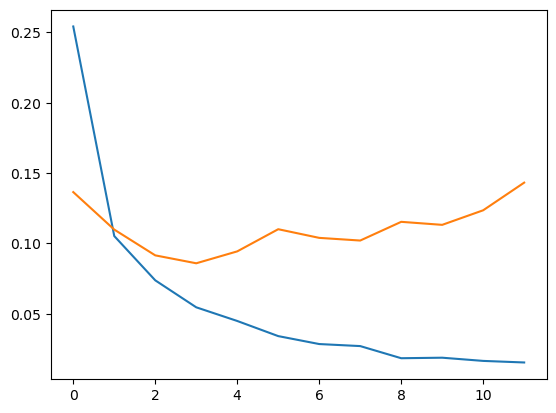

In [71]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [72]:
Y_prob=model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [73]:
Y_prob #tells the probability of the Digit in image

array([[2.37025060e-14, 3.09174626e-12, 1.76580296e-11, ...,
        1.00000000e+00, 6.07632278e-11, 3.00289882e-09],
       [2.45831940e-17, 8.05597017e-13, 1.00000000e+00, ...,
        6.20516171e-13, 4.52331271e-12, 3.74799689e-28],
       [1.67539431e-12, 9.99998569e-01, 7.99684159e-08, ...,
        1.36120059e-06, 3.11736281e-09, 1.10642174e-13],
       ...,
       [8.01162407e-17, 3.39664115e-13, 1.65340024e-16, ...,
        1.49648880e-08, 2.97078616e-12, 1.05145084e-07],
       [9.90740554e-21, 6.64037501e-17, 1.95728801e-20, ...,
        2.79029657e-19, 3.73975807e-12, 3.88764710e-21],
       [3.72727046e-18, 1.10850159e-21, 2.97758744e-24, ...,
        2.69647309e-28, 3.87668817e-21, 7.53727055e-21]], dtype=float32)

In [74]:
Y_pred=Y_prob.argmax(axis=1) #tells the maximum probability of occurence of a digit

In [75]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,Y_pred) #compares test data and predicted data then tells score

0.973

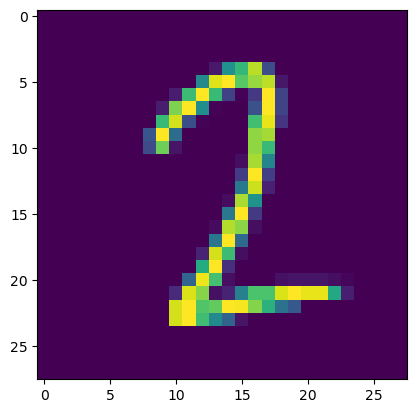

In [79]:
plt.imshow(X_test[456])


In [78]:
model.predict(X_test[456].reshape(1,28,28)).argmax(axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


array([2], dtype=int64)